# Computational Lab to Solve Schrodinger Equation

# Task 1: Analytical Solution for the Infinite Square Well

## Problem Statement

Solve the non-dimensional Schrödinger equation (2) analytically for the infinite square well where:

- **Potential:** ν(x̃) = −1 for 0 < x̃ < 1
- **Boundary conditions:** ψ(0) = ψ(1) = 0 (infinite walls)

**Find:**
1. Expression for the non-dimensional energy eigenvalues in terms of γ²
2. Normalized wave functions (in non-dimensional units)

---

## Solution

# Task 1: Analytical Solution for the Infinite Square Well

## Given Information

- Non-dimensional Schrödinger equation: $\frac{d^2\psi}{d\tilde{x}^2} + \gamma^2(\epsilon - \nu(\tilde{x}))\psi = 0$
- Potential: $\nu(\tilde{x}) = -1$ for $0 < \tilde{x} < 1$
- Boundary conditions: $\psi(0) = 0$ and $\psi(1) = 0$ (infinite walls)

---

## Derivation

### Step 1: Substitute the potential

With $\nu(\tilde{x}) = -1$, the equation becomes:

$$\frac{d^2\psi}{d\tilde{x}^2} + \gamma^2(\epsilon - (-1))\psi = 0$$

$$\frac{d^2\psi}{d\tilde{x}^2} + \gamma^2(\epsilon + 1)\psi = 0$$

### Step 2: Define $k^2 = \gamma^2(\epsilon + 1)$

The equation simplifies to:

$$\frac{d^2\psi}{d\tilde{x}^2} + k^2\psi = 0$$

This is a simple harmonic oscillator equation with general solution:

$$\psi(\tilde{x}) = A \sin(k\tilde{x}) + B \cos(k\tilde{x})$$

### Step 3: Apply boundary conditions

**Left boundary ($\tilde{x} = 0$):**

$$\psi(0) = A \sin(0) + B \cos(0) = B = 0$$

So $B = 0$, giving us: $\psi(\tilde{x}) = A \sin(k\tilde{x})$

**Right boundary ($\tilde{x} = 1$):**

$$\psi(1) = A \sin(k) = 0$$

For non-trivial solutions ($A \neq 0$), we need: $\sin(k) = 0$

This gives us: **$k = n\pi$**, where $n = 1, 2, 3, \ldots$

### Step 4: Find energy eigenvalues

From $k^2 = \gamma^2(\epsilon + 1)$ and $k = n\pi$:

$$(n\pi)^2 = \gamma^2(\epsilon + 1)$$

$$n^2\pi^2 = \gamma^2(\epsilon + 1)$$

$$\epsilon + 1 = \frac{n^2\pi^2}{\gamma^2}$$

$$\boxed{\epsilon_n = \frac{n^2\pi^2}{\gamma^2} - 1, \quad n = 1, 2, 3, \ldots}$$

### Step 5: Normalize the wave functions

The unnormalized wave function is: $\psi_n(\tilde{x}) = A \sin(n\pi\tilde{x})$

Normalization condition:

$$\int_0^1 |\psi_n(\tilde{x})|^2 d\tilde{x} = 1$$

$$\int_0^1 A^2 \sin^2(n\pi\tilde{x}) d\tilde{x} = 1$$

Using the integral: $\int_0^1 \sin^2(n\pi\tilde{x}) d\tilde{x} = \frac{1}{2}$

$$A^2 \cdot \frac{1}{2} = 1$$

$$A^2 = 2$$

$$A = \sqrt{2}$$

$$\boxed{\psi_n(\tilde{x}) = \sqrt{2} \sin(n\pi\tilde{x}), \quad n = 1, 2, 3, \ldots}$$

---

## Final Results

### Energy Eigenvalues

$$\epsilon_n = \frac{n^2\pi^2}{\gamma^2} - 1, \quad n = 1, 2, 3, \ldots$$

### Normalized Wave Functions

$$\psi_n(\tilde{x}) = \sqrt{2} \sin(n\pi\tilde{x}), \quad 0 \leq \tilde{x} \leq 1$$

### First Few States

| $n$ | Energy $\epsilon_n$ | Wave Function |
|-----|---------------------|---------------|
| 1 | $\frac{\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(\pi\tilde{x})$ |
| 2 | $\frac{4\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(2\pi\tilde{x})$ |
| 3 | $\frac{9\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(3\pi\tilde{x})$ |

---



# Task 2: Numerical Solution for the Wave Function

## Objective

Find the wave function $\psi$ numerically in the infinite square well for a given non-dimensional trial energy $\epsilon$. 


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [29]:
# Constants
N = 1000  # Number of grid points
gamma_squared = 200  # γ²
l = 1.0 / (N - 1)  # Step size
x = np.linspace(0, 1, N)  # Discretized x values

In [30]:
# Potential: Infinite square well
potential = np.full(N, -1.0)  # ν(x) = -1 for 0 < x < 1

In [31]:
# Function to compute k²
def compute_k_squared(energy, potential, gamma_squared):
    return gamma_squared * (energy - potential)

In [64]:
# Function to solve Schrödinger equation numerically
def solve_schrodinger(energy, potential, gamma_squared, N, l):
    k_squared = compute_k_squared(energy, potential, gamma_squared)
    psi = np.zeros(N)
    psi[1] = 1e-4  # Arbitrary small value for initial slope

    # Iteratively compute psi using the finite difference method
    for n in range(1, N - 1):
        psi[n + 1] = (
            2 * (1 - (5 / 12) * l**2 * k_squared[n]) * psi[n]
            - (1 + (1 / 12) * l**2 * k_squared[n - 1]) * psi[n - 1]
        ) / (1 + (1 / 12) * l**2 * k_squared[n + 1])

    return psi

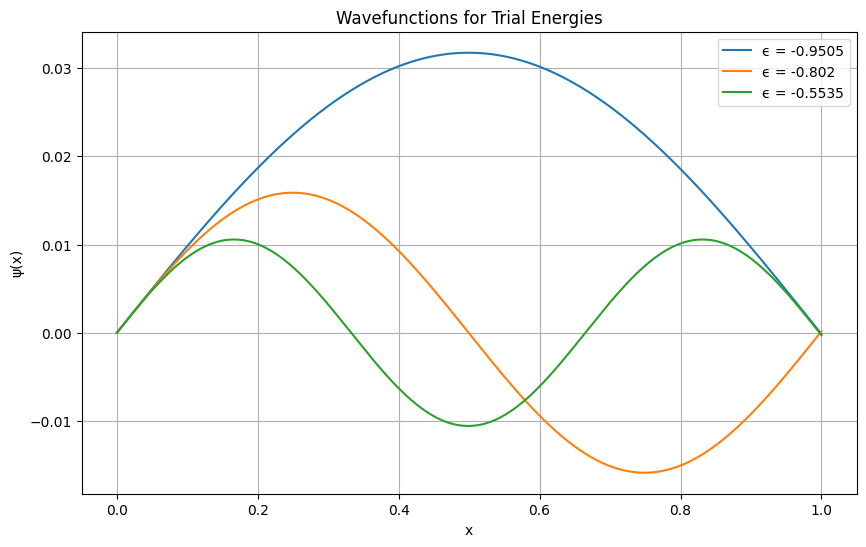

In [65]:


# Trial energies
trial_energies = [-0.9505, -0.802, -0.5535]  # Example trial energies

# Solve and plot wavefunctions for trial energies
plt.figure(figsize=(10, 6))
for energy in trial_energies:
    psi = solve_schrodinger(energy, potential, gamma_squared, N, l)
    plt.plot(x, psi, label=f"ϵ = {energy}")

plt.title("Wavefunctions for Trial Energies")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid()
plt.show()

4.3995928528313834e-08


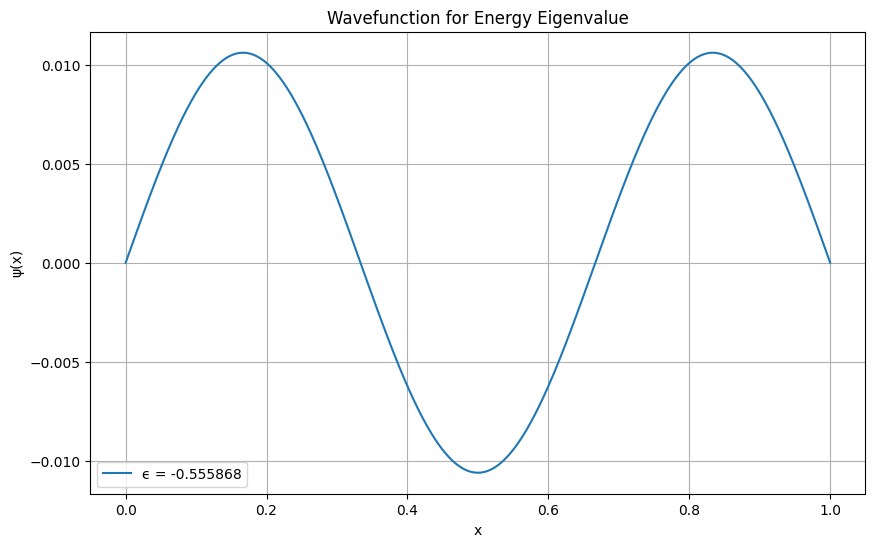

In [66]:
acc = 1e-6  # Desired accuracy for energy eigenvalues

# Define the energy bounds for the bisection method
energy_low = -0.999  # Lower bound for energy
energy_high = 0.0  # Upper bound for energy

# Solve and plot wavefunctions for the eigenvalue
plt.figure(figsize=(10, 6))

while abs(energy_high - energy_low) > acc:
    energy_mid = (energy_low + energy_high) / 2  # Midpoint energy
    psi = solve_schrodinger(energy_mid, potential, gamma_squared, N, l)

    # Check the sign of the wavefunction at the last point
    if psi[-1] > 0:
        energy_low = energy_mid  # Move the lower bound up
    else:
        energy_high = energy_mid  # Move the upper bound down

# Final energy eigenvalue
energy_eigenvalue = (energy_low + energy_high) / 2
psi = solve_schrodinger(energy_eigenvalue, potential, gamma_squared, N, l)
print(psi[-1])

# Plot the wavefunction
plt.plot(x, psi, label=f"ϵ = {energy_eigenvalue:.6f}")
plt.title("Wavefunction for Energy Eigenvalue")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid()
plt.show()